
<a href="https://colab.research.google.com/github/kokchun/Databehandling-AI22/blob/main/Exercises/E01_missing_aggregation.ipynb" target="_parent"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; to see hints and answers.

---
# Missing data and aggregations exercises

---
These are introductory exercises in Pandas with focus in **syntax, indexing, data selection, missing data, aggregations, visualizations** and **data cleaning**.

<p class = "alert alert-info" role="alert"><b>Note</b> all datasets used in this exercise can be found under Data folder of the course Github repo</p>

<p class = "alert alert-info" role="alert"><b>Note</b> that there are usually many ways to achieve same results using operations in pandas. Feel free to investigate several ways. </p>

<p class = "alert alert-info" role="alert"><b>Note</b> that in cases when you start to repeat code, try not to. Create functions to reuse code instead. </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to use <b>descriptive variable, function, index </b> and <b> column names</b> in order to get readable code </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to format your input questions in a pedagogical way to guide the user

The number of stars (\*), (\*\*), (\*\*\*) denotes the difficulty level of the task

---

## 1. Find missing values (*)

&nbsp; a) Read in the file "student-mat-missing-data.csv" found in the course github repo into a Pandas DataFrame

&nbsp; b) Do some initial explorations with the methods to get an understanding of the dataset:
```py
head(), info(), describe(), value_counts(), unique(), columns()
```

&nbsp; c) Create a function that takes in a DataFrame as input parameter and plots a barplot with the columns that have missing values. Put this function into a file called data_utils.py.
When you come across more useful functions, you can store them in your data_utils module. 

&nbsp; d) Now import your function from the module data_utils and use it to visualize NaNs in your dataset.

&nbsp; e) Find all rows where the freetime is NaN.   

&nbsp; f) Find all rows where the freetime **or** the age is NaN.  

&nbsp; g) You will notice that some rows have several NaNs. Now compute the proportion that these rows constitute of the whole dataset.

<details>
<summary>Hint</summary>

&nbsp; c) Use 
```py
isnull()
```
in combination with aggregation functions such as 
```py
sum()
```

Use seaborn to plot

f) use bitwise or: | 


</details>

<br/>

<details>

<summary>Answer</summary>

d)

![null values graph](../assets/null_vals_student.png)

e) 

These row indices: 
[87, 99, 130, 149, 151, 160, 191, 257, 276, 293, 308, 330, 343, 359, 372, 385]
 
f) 

These row indices:
[20,  71,  87,  99, 102, 106, 121, 130, 149, 151, 160, 188, 191, 214, 257, 270, 276, 293, 308, 330, 343, 348, 359, 372, 385]

g) 

These rows constitutes 0.0127 of the dataset

h)

![null values graph after cleaned once](../assets/null_vals_student_2.png)

</details>

True
age         14
address      5
famrel       5
freetime    16
goout        5
health       5
absences     5
dtype: int64


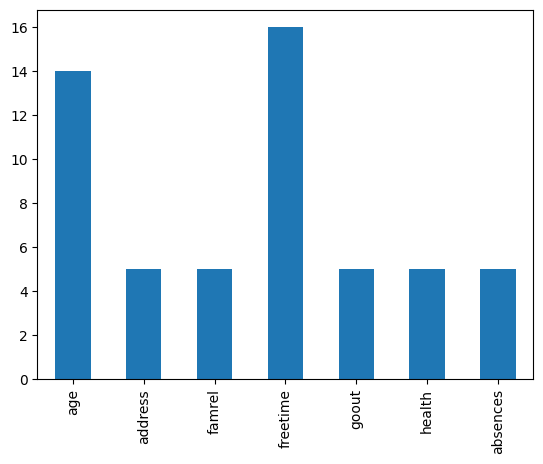

 Number of rows with multiple NaN values = 1.27%


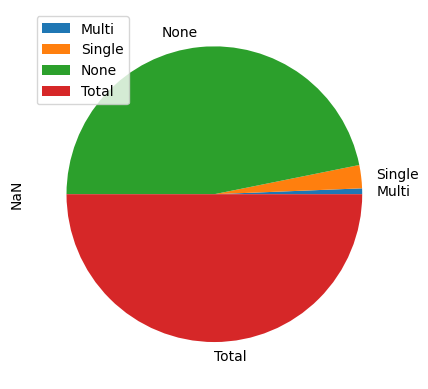

In [512]:
# Answer
import pandas as pd 
import matplotlib.pyplot as plt
from data_utils import h

# a) Read in the file from ../Data/student-mat-missing-data.csv
df = pd.read_csv( "../Data/student-mat-missing-data.csv" )

# b) Do some exploration 
#df.head()
#df.info()
#df.describe()
#df.value_counts() 
#df.unique()
#df.columns


# c) Create a function that takes DF as a parameter and plot 
#    with the columns that have missing values

def plt_black():

    ffc = "#1f1f1f"
    fig, ax = plt.subplots(dpi=300, figsize=(6,6), facecolor=ffc)
    ax.set_facecolor("#181818")   
    ax.spines['bottom'].set_color("#494949")
    ax.spines['left'].set_color("#494949")
    ax.spines['top'].set_color("#1f1f1f")
    ax.spines['right'].set_color("#1f1f1f")
    ax.tick_params(axis='x', colors="#afafaf")
    ax.tick_params(axis='y', colors="#afafaf")
    ax.grid(visible=None, which='major', axis='both', color="#222222")

    #plt.show()
    #plt.close()


def plot_missing_values( df:"DataFrame" )->None:
    print( df.isnull().values.any() ) 
    print( df.isnull().sum()[ df.isnull().sum() > 0 ] )
    df.isnull().sum()[ df.isnull().sum() > 0 ].plot( kind="bar", )
    plt.show()

#pmv(df)
#h(df)
plot_missing_values(df)


# d) 
# Print out all rows where there is a NaN 
df[df.isnull().any(axis=1)] 
# Print out the index of the rows where there is NaN
df[df.isnull().any(axis=1)].index

#e)
# Print out the index of the row in a specific column where there is NaN
df["freetime"][df.isnull().any(axis=1)].index
#f) 
df[["freetime","age"]][df.isnull().any(axis=1)].index

#g) 
# iterrows returns the index and a python Series
# in the if i check is column in the row if the value is nan
# using pd.isna, if so I return a 1, 
# I then check if the list is greater then one, if so I return
# the index of the row
# Number of rows with Multiple NaN
nmn = len( [ idx for idx, row in df.iterrows() if sum([ 1 for val in row if pd.isna(val) ]) > 1 ] ) 
nsn = len( [ idx for idx, row in df.iterrows() if sum([ 1 for val in row if pd.isna(val) ]) == 1 ] ) 
# Number of rows with one or fewere NaN
nnn = len(df)-(nmn+nsn)
df_nan = pd.DataFrame()
df_nan.insert(0, "NaN", [nmn, nsn, nnn, len(df)], True)
# set_index uses the values of a column, handy if you have a column with unique names 
#df_nan.set_index("Multi")
df_nan.index=["Multi","Single","None","Total"]
df_nan.plot( kind="pie", subplots=True )
print( f" Number of rows with multiple NaN values = {round((nmn/len(df))*100, 2)}%") 


#df[df.isnull()] 

---
## 2. Clean the data (*)

&nbsp; a) As you have conversed with a domain expert you both agree that there are too many missing data to fill in and the proportion is small enough to be safe to just remove.  
Now remove these rows and use your missing-value utility function visualize the remaining NaNs.

&nbsp; b) The domain expert has told you that you have to fill in the missing age values.
Start with visualising the age distribution in the dataset using a histogram. 

&nbsp; c) Check which columns there are in the dataset to see what can be utilised in determining the age.

&nbsp; d) The column higher seems interesting. Let's see which unique values it can have. 

&nbsp; e) Let's see if we can see some connection between age distribution and higher.
Make 3 subplots of age histograms:
- Plot 1: same as b)
- Plot 2: age distribution when higher is yes 
- Plot 3: age distribution when higher is no  

&nbsp; f) That was hard to find a connection. When reading [dataset source](https://www.kaggle.com/uciml/student-alcohol-consumption) we find alcohol consumption, maybe there is some connection between age and alcohol consumption.
- Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
- Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

&nbsp; Start with creating a new column called Alcohol, which is a sum of Dalc and Walc columns

&nbsp; g) Make a barchart for alcohol consumption vs age.

&nbsp; h) We see that older students tend to drink more, but notice how few 20-22 year-old students we have in the dataset. We can definitely exclude them when computing the missing values. However there are also few 19 year-old students in the dataset, say for simplicity that we can exclude them as well. This leaves: 
- alcohol level >= 4 -> 16, 17 or 18 years old -> take median to simplify 
- alcohol level < 4 -> 15 years old

Fill these in and visualize missing values. 

&nbsp; Note: could make more stringent by computing percentages based on the distribution


<details>
<summary>Answer</summary>

a)

![null values graph after cleaned once](../assets/null_vals_student_2.png)

b)

![Age distribution](../assets/age_distribution_student.png)

c)

```python

Index(['Unnamed: 0', 'school', 'sex', 'age', 'address', 'famsize', 'Pstatus',
       'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime',
       'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime',
       'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')
```

d)

```python

array(['yes', 'no'], dtype=object)

```

e)

![Age distribution with higher](../assets/age_dist_higher.png)

f) 

```python

0      2
1      2
2      5
3      2
4      3
      ..
390    9
391    7
392    6
393    7
394    6
Name: Alcohol, Length: 390, dtype: int64

```

g)

![Age distribution vs alcohol](../assets/alcohol_age.png)

</details>

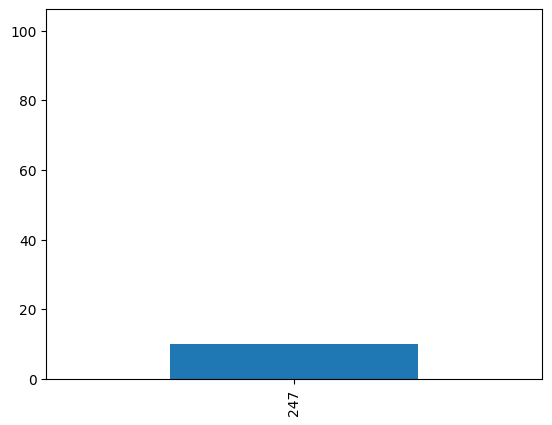

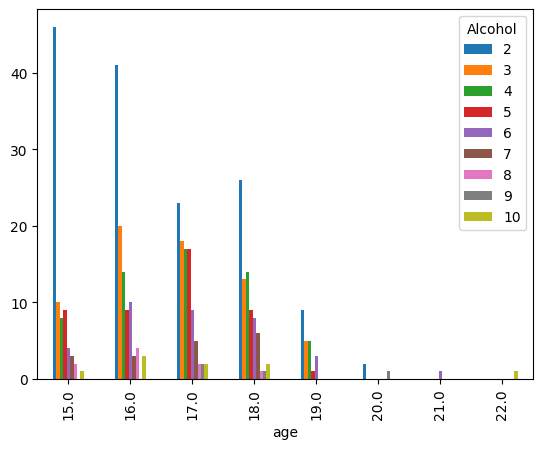

15.0

In [520]:
# Answer 
# a) 
# plot_missing_values(df)
# Rows with multipel missing values
mmn = [ idx for idx, row in df.iterrows() if sum([ 1 for val in row if pd.isna(val) ]) > 1 ]

# You don't have to permanently remove the rows, you can
# use df.drop directly in the plot_missing_values function
# but set inplace to False, probably
df.drop( index=mmn, inplace=True)
# plot_missing_values( df )


# b) 
#df.astype({"age":"int32"})
#df.hist( column="age", grid=False)
#df["age"].info()

# c) 

counter=dict()

#
# Crossreferences the occurens of column of groups with 
# all other columng of groups
def occurence_counter(cog):
    counter = dict()
    for idx, row in df.iterrows():
        for col, val in row.items():
            if col == "Unnamed: 0" : continue
        # if counter.get(f"{col}|{val}", None) == None:
            #  counter[f"{col}|{val}"] = dict()
            if counter.get(f"{col}|{val}|{df[cog][idx]}", None) == None:
                counter[f"{col}|{val}|{df[cog][idx]}"] = 1 
            else:
                counter[f"{col}|{val}|{df[cog][idx]}"] += 1
    return dict(sorted(counter.items(), key=lambda item: item[0]))

#counter = occurence_counter("age")
#counter


# Does basically the same thing as occurence_counter but 
# puts the data in to a Data Frame instead.
"""
def occurence_df(df,cog):
    dfn = pd.DataFrame()
    
    nidx = set(df[cog])
    nidx = sorted([ int(key) for key in nidx if pd.isna(key) == False ])
    nidx = pd.Series(nidx)

    dfn = dfn.index=nidx
    print( dfn ) 
    return dfn
df_age = occurence_df(df, "age")
"""

#print( [f"{key}:{val}" for key, val in counter.items()] )
#print( [ f"{key}-{val}" for key, val in counter.items() ] )
#print( [ [ ] for if idx != 0 ] )
#print( [ column for column in df ] )
#df.groupby( "school" )["age"].median()

#df_group = df.groupby("age")
#df_columns = df_group[ ["sex","G1","G2"] ]
#df_columns.count()
df.groupby("age")[ ["sex"] ].count()

df.groupby("higher")[ ["age"] ].count()

#d) 
df["higher"].unique()

#e) Sort of solved it but did't base it on age subplots

df.groupby("higher").get_group("yes")["age"].hist()
df.groupby("higher").get_group("no")["age"].hist()
    
#age_hi = [ for _ in df_ ]
#age_lo = 
#df_age[["age","age_hi","age_lo"]].hist(bins=8)
#df.hist(column="higher")

#f) Don't run insert more then once in the same code cell 
#   unless you remake the whole Data Frame because it seems
#   like it want's to stack ontop of it self
#df.insert(0, "Alcohol", df["Dalc"]+df["Walc"], True)
#df.head()

#g) 
df.groupby("age")["Alcohol"].plot( kind="bar")
df.groupby(["age", "Alcohol"]).size().unstack().plot(kind="bar")
plt.show()

#h) Fill in nan age, Alcohol > 4 = 17, < = 15
def set_age(age, alc):
    new_age = int() 
    if pd.isna(age) == False:
        return age
    if alc < 4:
        return 15 
    return 17

df["age"] = df.apply( lambda x:  set_age(x["age"], x["Alcohol"]) , axis=1)



---
## 3. Clean freetime column (**)

Now there are missing data on freetime that needs to be filled. 
- Try yourself and find reasonable approaches for how you would fill those missing data.
- Document what you have tried and different findings
- Combine suitable visualizations with pandas methods

In [526]:
# Need to come up with a solution to get a proper value, I just went with the mean
df["freetime"]
df["freetime"][df.isnull().any(axis=1)].index
df["freetime"] = df.apply( lambda row: 3 if pd.isna(row["freetime"]) else row["freetime"]  , axis=1 )



0      3.0
1      3.0
2      3.0
3      2.0
4      3.0
      ... 
390    5.0
391    4.0
392    5.0
393    4.0
394    2.0
Name: freetime, Length: 390, dtype: float64

---

Kokchun Giang

[LinkedIn][linkedIn_kokchun]

[GitHub portfolio][github_portfolio]

[linkedIn_kokchun]: https://www.linkedin.com/in/kokchungiang/
[github_portfolio]: https://github.com/kokchun/Portfolio-Kokchun-Giang

---